# Objectives

## About the dataset

**You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.**

**Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.**

you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load the data set
df = pd.read_csv("drug200.csv")

In [14]:
# Check first five values on the data set
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [26]:
# Check the columns name
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [52]:
# Check the missing value
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

No missing value present in the data set

In [53]:
# Check the value of descriptive statistics for continuous variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [65]:
# Check the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [67]:
# Check the duplicate rows 
df.duplicated().sum()

0

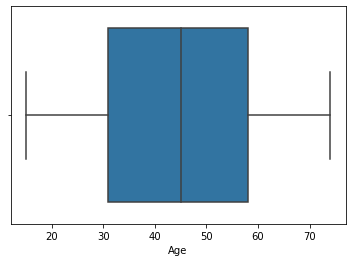

In [70]:
# Check the outliers in Age column using Box plot
sns.boxplot(df['Age'])
plt.show();

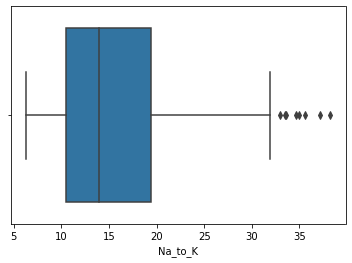

In [71]:
sns.boxplot(df['Na_to_K'])
plt.show()

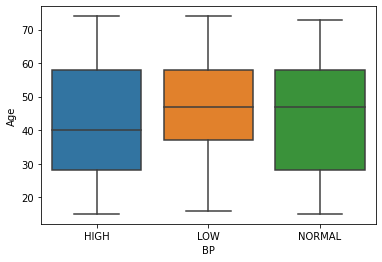

In [72]:
sns.boxplot(x='BP',y ='Age', data = df)
plt.show()

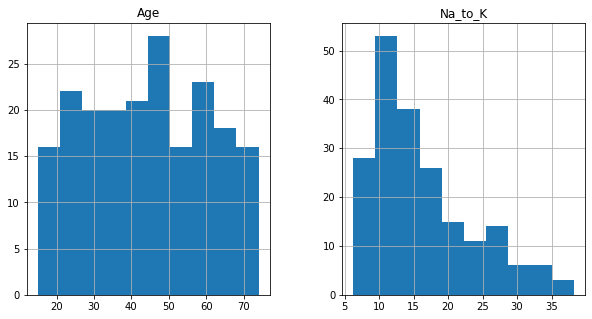

In [73]:
df.hist(figsize=(10,5))
plt.show();

In [34]:
# Now we create a crosstab
pd.crosstab(df['Sex'],df['BP'],margins =True)

BP,HIGH,LOW,NORMAL,All
Sex,,,,
F,38,28,30,96
M,39,36,29,104
All,77,64,59,200


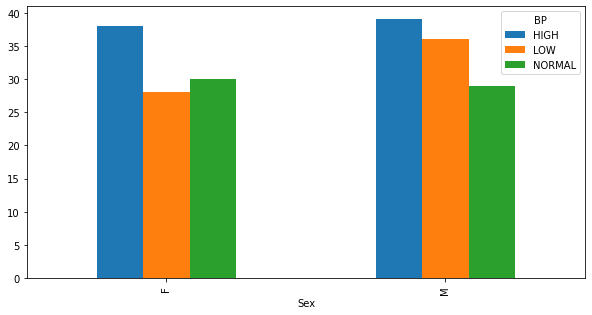

In [80]:
pd.crosstab(df['Sex'],df['BP']).plot(kind = 'bar', figsize = (10,5))
plt.show();

In [43]:
pd.crosstab(df['Sex'],df['Cholesterol'], margins = True)

Cholesterol,HIGH,NORMAL,All
Sex,,,
F,49,47,96
M,54,50,104
All,103,97,200


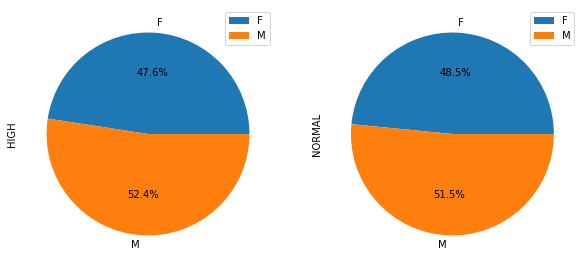

In [81]:
pd.crosstab(df['Sex'],df['Cholesterol']).plot(kind= 'pie',subplots=True, figsize=(10,5),autopct = '%0.1f%%')
plt.show()

In [82]:
pd.crosstab(df['Sex'],df['Drug'], margins = True)

Drug,drugA,drugB,drugC,drugX,drugY,All
Sex,,,,,,
F,9,6,7,27,47,96
M,14,10,9,27,44,104
All,23,16,16,54,91,200


<AxesSubplot:xlabel='Sex'>

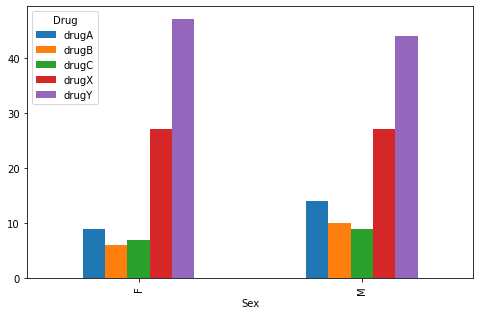

In [89]:
pd.crosstab(df['Sex'],df['Drug']).plot(kind = 'bar', figsize = (8,5))

In [86]:
pd.crosstab(df['Cholesterol'],df['Drug'],margins = True)

Drug,drugA,drugB,drugC,drugX,drugY,All
Cholesterol,,,,,,
HIGH,12,8,16,20,47,103
NORMAL,11,8,0,34,44,97
All,23,16,16,54,91,200


<AxesSubplot:xlabel='Cholesterol'>

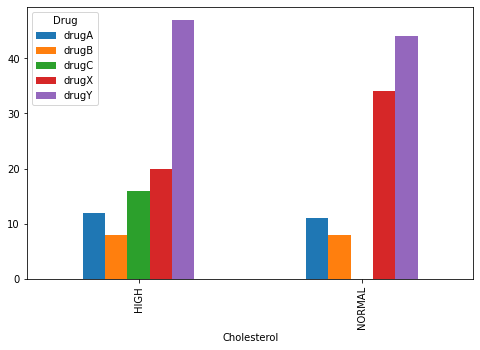

In [90]:
pd.crosstab(df['Cholesterol'],df['Drug']).plot(kind= 'bar', figsize=(8,5))

In [87]:
pd.crosstab(df['BP'],df['Drug'],margins = True)

Drug,drugA,drugB,drugC,drugX,drugY,All
BP,,,,,,
HIGH,23,16,0,0,38,77
LOW,0,0,16,18,30,64
NORMAL,0,0,0,36,23,59
All,23,16,16,54,91,200


<AxesSubplot:xlabel='BP'>

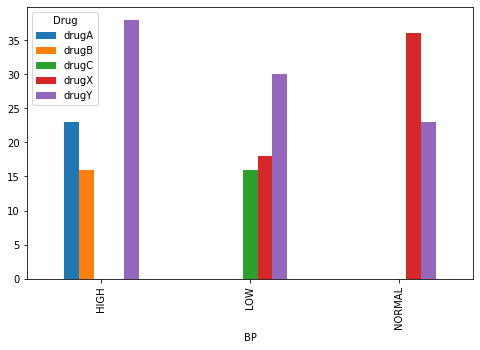

In [92]:
pd.crosstab(df['BP'],df['Drug']).plot(kind = 'bar', figsize=(8,5))

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>

Remove the column containing the target name since it doesn't contain numeric values.


In [99]:
#x = df[['Age','Sex','BP','Cholesterol', 'Na_to_K']].values
#x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()**
to convert the categorical variable into dummy/indicator variables.

Mainly two types Encoding we use 1. Label Encoding and 2. One hot Encoding. Both are call from sklearn library
for **onehot encoding
from sklearn from sklearn.preprocessing import OneHotEncoder**
**for LabelEncoder
sklearn from sklearn.preprocessing import LabelEncoder**

In [100]:
# The get_dummies() function is used to convert categorical variable into dummy/indicator variables.
from sklearn.preprocessing import LabelEncoder


In [107]:
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder()
df ['Sex'] = label_encoder.fit_transform(df['Sex'])
df ['BP'] = label_encoder.fit_transform(df['BP'])
df ['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

In [108]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


#### Now split the data set into training set & test set. Now we randomly split into 70% training and 30% testing. Before that we have first separate the data independent variable and dependent varaible.

In [109]:
X = df.drop('Drug',axis =1)
y = df.pop('Drug')

In [110]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [111]:
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [112]:
# Now split the data set
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [114]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y, test_size = .30, random_state = 3)

In [115]:
# Check the shape of the data set after splitting
print('Shape of X training set {}'.format(X_trainset.shape), 'Shape of y_trainset set{}'.format(y_trainset.shape))

Shape of X training set (140, 5) Shape of y_trainset set(140,)


In [116]:
#Print the shape of X_testset and y_testset. Ensure that the dimensions match.
print('Shpae of X test set {}'.format(X_testset.shape),' Shape of y_test set {}'.format(y_testset.shape))

Shpae of X test set (60, 5)  Shape of y_test set (60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [118]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dt_model = DecisionTreeClassifier(criterion ='entropy', max_depth = 4)
dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [122]:
# fit the model
dt_model.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [123]:
predTree = dt_model.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [128]:
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [130]:
from sklearn import metrics

In [131]:
print('Decision Tree Accuracy: ', metrics.accuracy_score(y_testset,predTree))

Decision Tree Accuracy:  0.9833333333333333


In [140]:
# Create report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
print(classification_report(y_testset,predTree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

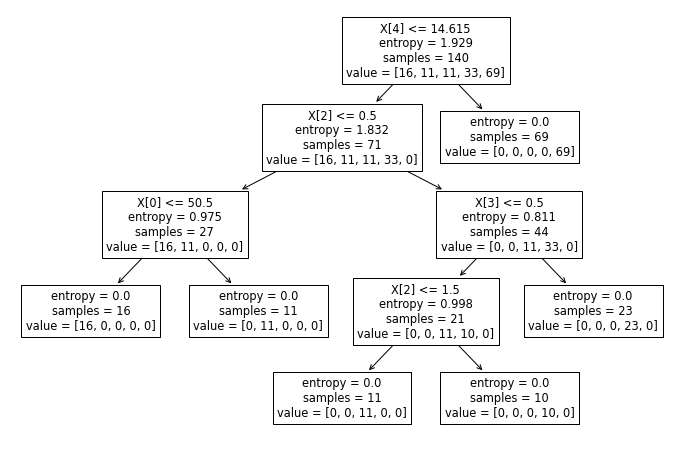

In [139]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model)
plt.show()